## Установка зависимостей

In [17]:
%pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


## Импорты

In [18]:
import numpy as np
import matplotlib.pyplot as plt

## Релизация функций активации

In [ ]:
def identity(x):
    return x

def unit_step(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

## Визуализация функций активации

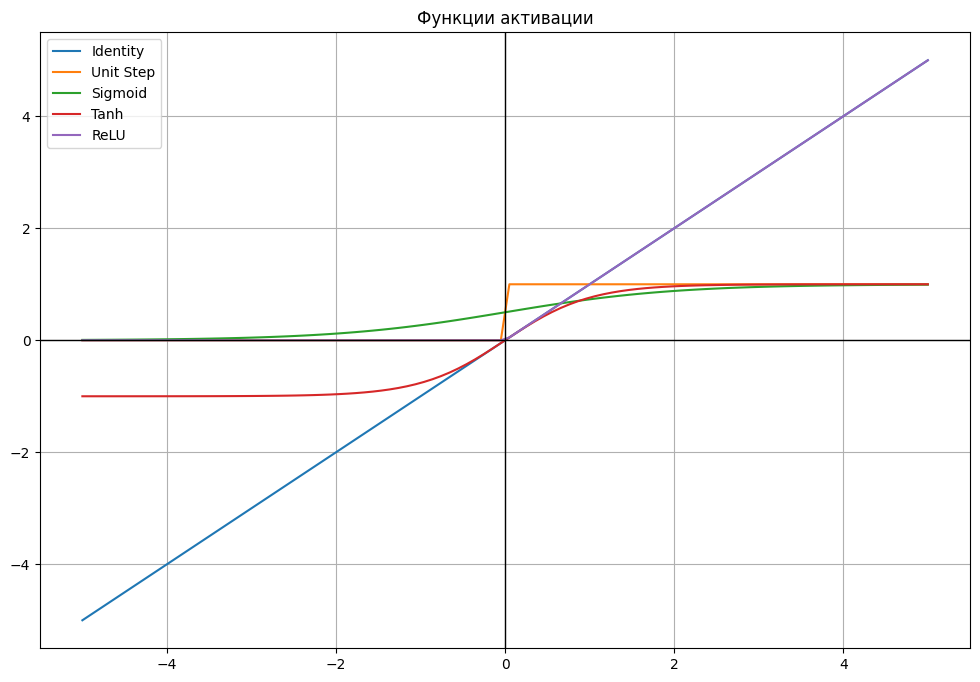

In [20]:
x = np.linspace(-5, 5, 100)
plt.figure(figsize=(12, 8))
plt.plot(x, identity(x), label='Identity')
plt.plot(x, unit_step(x), label='Unit Step')
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, tanh(x), label='Tanh')
plt.plot(x, relu(x), label='ReLU')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.title("Функции активации")
plt.legend()
plt.grid(True)
plt.show()

## Реализация перцептрона

In [21]:
class Perceptron:
    def __init__(self, input_size, activation_fn, learning_rate=0.1):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.activation_fn = activation_fn
        self.lr = learning_rate
        self.history = []

    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        return self.activation_fn(z)

    def train(self, X, y, epochs=10):
        for epoch in range(epochs):
            total_error = 0
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.lr * error * X[i]
                self.bias += self.lr * error
                total_error += error**2
            self.history.append(total_error)

## Функция визуализации того, как нейрон разделяет плоскость при разных функциях активации

In [22]:
def plot_decision_boundaries(X, y, functions_dict):
    h = .02 
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    plt.figure(figsize=(15, 5))
    
    for i, (name, fn) in enumerate(functions_dict.items()):
        p = Perceptron(input_size=2, activation_fn=fn)
        p.train(X, y, epochs=50)
        
        grid_input = np.c_[xx.ravel(), yy.ravel()]
        Z = np.array([p.predict(point) for point in grid_input])
        Z = Z.reshape(xx.shape)

        plt.subplot(1, len(functions_dict), i + 1)
        plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)
        
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
        plt.title(f'Граница решений: {name}')
        plt.xlabel('Вход X1')
        plt.ylabel('Вход X2')

    plt.tight_layout()
    plt.show()

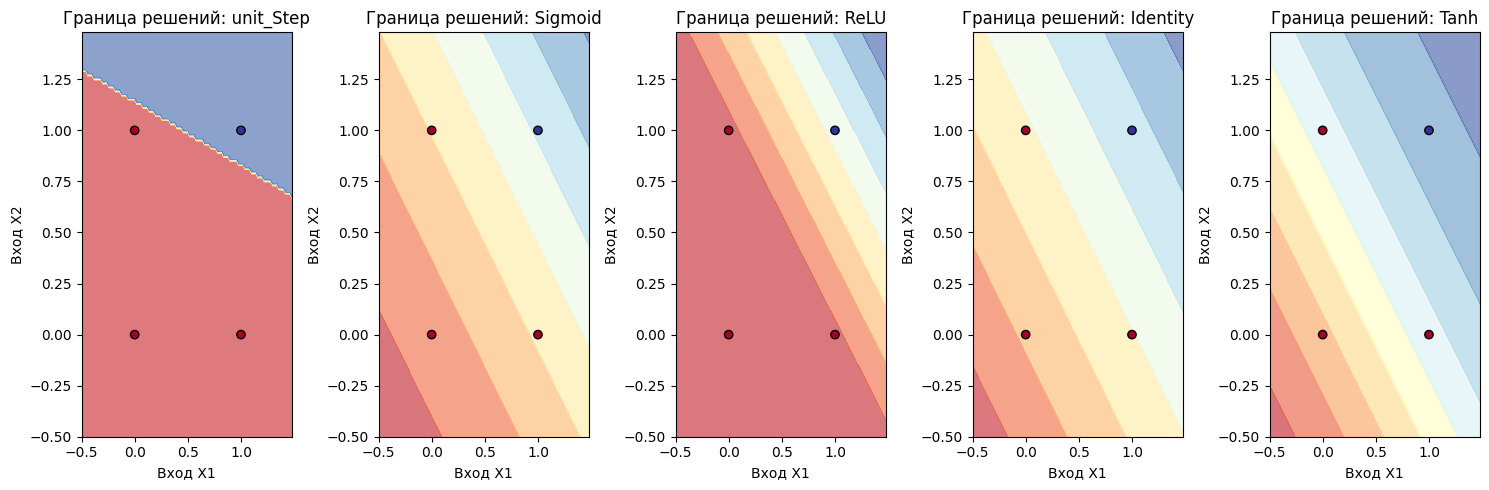

In [23]:
test_functions = {'unit_Step': unit_step, 'Sigmoid': sigmoid, 'ReLU': relu, 'Identity': identity, 'Tanh': tanh}
plot_decision_boundaries(X, y, test_functions)

## Изучение поведения

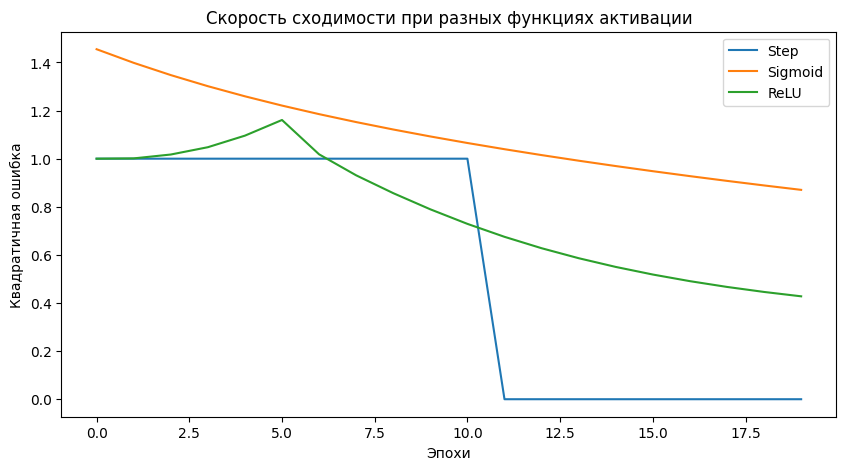

In [24]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])

functions = {'Step': unit_step, 'Sigmoid': sigmoid, 'ReLU': relu}
plt.figure(figsize=(10, 5))

for name, fn in functions.items():
    p = Perceptron(input_size=2, activation_fn=fn)
    p.train(X, y, epochs=20)
    plt.plot(p.history, label=name)

plt.title("Скорость сходимости при разных функциях активации")
plt.xlabel("Эпохи")
plt.ylabel("Квадратичная ошибка")
plt.legend()
plt.show()

### 1. **Что делает функция активации в искусственном нейроне?** ###
    Она решает, какой сигнал пойдет на выход после того, как нейрон сложил все входящие данные. Т.е. она добавляет «кривизны» в расчеты. Без неё нейрон мог бы строить только прямые линии, а с ней он может решать более тяжелые задачи.

### 2. **Чем отличается искусственный нейрон от однослойного перцептрона?** ###
    Нейрон — это база, самый мелкий элемент. А однослойный перцептрон — это уже простейшая сетка из таких нейронов.

### 3. **Какое правило используется для обучения перцептрона?** ###
    Обучается по дельта-правилу. Мы смотрим, насколько сильно нейрон ошибся (разница между тем, что ждали, и тем, что получили), и на основе этой ошибки немного изменяем веса в нужную сторону, чтобы в следующий раз ответ был точнее.

### 4. **Почему однослойный перцептрон не может решить задачу XOR?** ###
    Потому что XOR — это линейно неразделимая задача. Однослойный перцептрон умеет проводить только одну прямую линию, чтобы разделить «да» и «нет». А в XOR точки разбросаны так, что одной прямой их никак не отделить — нужно либо два слоя, либо кривая линия.

### 5. Что произойдет, если изменить функцию активации с сигмоиды на ReLU? ### 
    Станет лучше и быстрее. У сигмоиды на больших значениях затухает градиент, а ReLU всегда работает хорошо.

*       Из плюсов: Сетка учится в разы быстрее.

*       Из минусов: Нейрон может «уснуть» (Dying ReLU) — если он уйдет в глубокий минус, то начнет выдавать сплошные нули и вообще перестанет учиться.